In [1]:
using Statistics,StatsPlots,Distributions,Plots;

In [2]:
using LaTeXStrings;

#### controlled Variate Method

Let  we want to approximate the integral $g(x) = \int_{0}^{1} e^x dx$. So, here we compute the exact integration by taking $f(X) \sim {U}(0,1)$. Choose $\psi(x)$ is follow Uniform distribution. Let, $\hat{\theta_{c}} = g(x) + c(\psi(x) - \mu)$, where $\mu = E_{f}[\psi(x)],X \sim f$.Then $E[\hat{\theta_{c}}] = E_{f}[g(X)]$ , that means $\hat{\theta_c}$ is unbiased for $g(x)$ and var$(\hat{\theta_{c}})=$  var$(g(X) + c^{2}$var$\psi(X)$+ $2$cov$(g(X),\psi(X))$. 

We want the variance should be minimum. So we find that for $c = -\frac{Cov(g(X),\psi(X))}{Var(\psi(X))}$ the variance is minimum,call it as $c^{*}$.

Then $\hat{\theta_{c}} = g(X) - \frac{Cov(g(X),\psi(X))}{Var(\psi(X))}(\psi(X) - \mu)$.

If we take the sample mean estimator is $\hat{\theta}$, then $\hat{\theta} = \sum_{1}^m g(X_{i})$ and variance of this estimator is var($\hat{\theta})$ = Var$(\frac{Var(g(X))}{m})$. 

But for the new estimator $\hat{\theta_{c}}$ = Var$\frac{(g(X))}{m}$ - $\frac{2}{m}$$\frac{(Cov(g(X),\psi(X)))^{2}}{Var(\psi(X))}$. So $\frac{(Cov(g(X),\psi(X)))^{2}}{Var(\psi(X))}$ this is quantity of reduction of variance. 

$\% $ reduction in variance is = $100 \times \frac{(Var(\hat{\theta}) - Var(\hat{\theta_{c}}))}{Var(\hat{\theta})} = 100 \times \rho$, where $\rho =$ Correlation coefficient of $(g(X),\psi(Y))$.

Here we call that $\psi(x)$ function as **Controlled Variable**.

In [3]:
m = 1000

x = rand(Uniform(),m)
y = exp.(x)
theta_hat = mean(y)
se_theta_hat = std(y)/sqrt(m)


0.015332358968861384

In [4]:
mean(y)

1.7245887384266463

In [5]:
c_star = -6*(3 - exp(1))

m1 = 10000
U = rand(Uniform(),m1)
T1 = exp.(U)
T2 = exp.(U) + c_star*(U .- mean(U));
mean(T1),mean(T2)

(1.7202900068514115, 1.7202900068514122)

In [6]:
U = rand(Uniform(),m)
mean(U)

0.5081087554178858

In [7]:
variance_monte_carlo = std(T1)/sqrt(m)
variance_psi = std(T2)/sqrt(m)

0.0019916889785531744

In [8]:
println(std(T1))
println(std(T2))

0.491961051939191
0.06298273562882281


In [9]:
percentage_reduction = (((std(T1)) - std(T2))/(std(T1)))*100

87.1976174982633

### Important Sampling Mehtod

**Problem :** We want to integrate $\int_{0}^{1} \frac{e^{-x}}{1 + x^2} dx$. We take five different functions 
* $f_{0}(x) = 1,0 < x<1$
* $f_{1}(x) = e^{(-x)}, 0 <x<\infty$
* $f_{2}(x) = \frac{1}{\pi}\frac{1}{1 +x^2} , -\infty < x < \infty$
* $f_{3}(x) = \frac{e^{-x}}{1 - e^{-1}}, 0 < x< 1$
* $f_{4}(x) = \frac{4}{\pi}\frac{1}{1 + x^2} , 0 <x < 1$.

Here all these functions are probability density functions.
We need to find that probability density functions for which the variance of $\frac{g(x)}{f_{i}(x)}$ is minimum for $i = 0,1,2,3,4$.

Assume that, we don't know how to generate random samples from $f_{i} ,\forall i, 0 \le i \le 4$. So we generate samples  from unifrom distributions and then use inverse distribution function to generate from the original $f$.

Finally we also draw the graphs of $\frac{g(x)}{f_{i}(x)}$ for $i = 0,1,2,3,4$ to look at that for which $i$ this ratio comes as approximately constant as $E[g(X)] = \int_{0}^{1} g(x)dx = \int_{0}^{1} \frac{g(x)}{f(x)}f(x) dx$. So if the ratio  $\frac{g(x)}{f(x)}$ is more likely constant, then $E[g(X)]$ is will become an integral of a  density function, that is easy to computing.

In [10]:
function g(x)
    if (0 < x < 1)
        exp(-x)/(1 + x^2)
    else
        return 0
    end
end


g (generic function with 1 method)

In [11]:
g(0.9)

0.2246241214036459

In [12]:
function f0(x)
    1*(0<x<1)
end
        

f0 (generic function with 1 method)

In [13]:
function f1(x)
        exp(-x)*(x>0)
end

f1 (generic function with 1 method)

In [14]:
function f2(x)
    (1/pi)*(1/(1 + x^2))
end

f2 (generic function with 1 method)

In [15]:
function f3(x)
    (exp(-x)/(1 - exp(-1)))*(x>0)*(x<1)
end

f3 (generic function with 1 method)

In [16]:
function f4(x)
    (4/pi)*(1/(1 + x^2))*(x> 0)*(x<1)
end

f4 (generic function with 1 method)

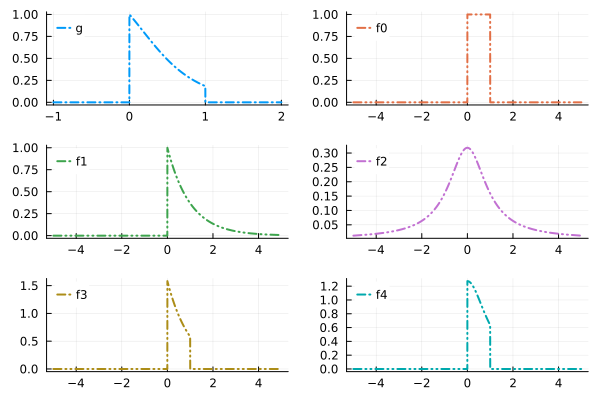

In [17]:

p1 = plot(g,-1,2,color = 1,linewidth = 2,linestyle = :dashdot,label = "g",fg_legend = false)
p2 = plot(f0,color = 2,linestyle = :dashdotdot,linewidth = 2,label = "f0",fg_legend = false)
p3 = plot(f1,color = 3,linestyle = :dashdotdot,linewidth = 2,label = "f1",fg_legend = false)
p4 = plot(f2,color = 4,linestyle = :dashdotdot,linewidth = 2,label = "f2",fg_legend = false)
p5 = plot(f3,color = 5,linestyle = :dashdotdot,linewidth = 2,label = "f3",fg_legend = false)
p6 = plot(f4,color = 6,linestyle = :dashdotdot,linewidth = 2,label = "f4",fg_legend = false)
plot(p1,p2,p3,p4,p5,p6,layout = (3,2))

In [18]:
m2 = 10000
theta_hat = []
se_theta_hat = []

## for f0 function
x = u = rand(Uniform(),m2)
gf_0 = g.(x)./f0.(x)
push!(theta_hat,mean(gf_0))
printstyled(theta_hat,color = :blue)
theta_hat
push!(se_theta_hat,std(gf_0)/sqrt(m2))




Any[0.5222681642833257]

1-element Vector{Any}:
 0.0024272221229010675

In [19]:
## for f1 function
x = -log.(1 .- u)
gf_1 = g.(x)./f1.(x)
push!(theta_hat,mean(gf_1))
push!(se_theta_hat,std(gf_1)/sqrt(m2))

2-element Vector{Any}:
 0.0024272221229010675
 0.00418052879073382

In [20]:
## for f2 function
x = tan.(pi*(u .- 1/2));
gf_2 = g.(x)./f2.(x);

In [21]:
push!(theta_hat,mean(gf_2))
push!(se_theta_hat,std(gf_2)/sqrt(m2))

3-element Vector{Any}:
 0.0024272221229010675
 0.00418052879073382
 0.00956841356340864

In [22]:
## for f3 function
x = - log.(1 .- u*(1 - exp(-1)))
gf_3 = g.(x)./f3.(x)
push!(theta_hat,mean(gf_3))
push!(se_theta_hat,std(gf_3)/sqrt(m2))


4-element Vector{Any}:
 0.0024272221229010675
 0.00418052879073382
 0.00956841356340864
 0.0009599628308418644

In [23]:
## for f4 function
x = tan.((u*pi)/4)
gf_4 = g.(x)./f4.(x)
push!(theta_hat,mean(gf_4))
push!(se_theta_hat,std(gf_4)/sqrt(m2))


5-element Vector{Any}:
 0.0024272221229010675
 0.00418052879073382
 0.00956841356340864
 0.0009599628308418644
 0.0013981587118066753

In [24]:
[round.(theta_hat,digits = 5),round.(se_theta_hat,digits = 7)]

2-element Vector{Vector{Float64}}:
 [0.52227, 0.5211, 0.53698, 0.52458, 0.52363]
 [0.0024272, 0.0041805, 0.0095684, 0.00096, 0.0013982]

In [25]:
p = plot(g,0,1,color = 1,linewidth = 4,linestyle = :dot,label = "g",fg_legend = false)
p = plot!(f0,color = 2,linestyle = :dashdotdot,linewidth = 2,label = "f0",fg_legend = false)
p = plot!(f1,color = 3,linestyle = :dashdotdot,linewidth = 2,label = "f1",fg_legend = false)
p = plot!(f2,color = 4,linestyle = :dashdotdot,linewidth = 2,label = "f2",fg_legend = false)
p = plot!(f3,color = 5,linestyle = :dashdotdot,linewidth = 2,label = "f3",fg_legend = false)
p = plot!(f4,color = :red,linestyle = :dashdotdot,linewidth = 2,label = "f4",fg_legend = false)
savefig("important sampling")

"C:\\Users\\hp\\Julia_files\\Statistics with Julia\\important sampling.png"

In [26]:
p1 = histogram(g.(x)./f0.(x),normalize = true,bins = 20,label = L"g/f_0",color = :red,fg_legend = :transparent)
p2 = histogram(g.(x)./f1.(x),normalize = true,bins = 30,label = L"g/f_1",color = :green,fg_legend = :transparent)
p3 = histogram(g.(x)./f2.(x),normalize = true,bins = 40,label = L"g/f_2",color = :yellow,fg_legend= :transparent)
p4 = histogram(g.(x)./f3.(x),normalize = true,bins = 50,label = L"g/f_3",color = :blue,fg_legend = :transparent)
p5 = histogram(g.(x)./f4.(x),normalize = true,bins = 60,label = L"g/f_4",color = :magenta,fg_legend = :transparent)
plot!(p1,p2,p3,p4,p5,layout = (2,3))
savefig("important sampling 1")

"C:\\Users\\hp\\Julia_files\\Statistics with Julia\\important sampling 1.png"

In [27]:

function gf_00(x)
    g(x)/f0(x)
end

function gf_01(x)
    g(x)/f1(x)
end

function gf_02(x)
    g(x)/f2(x)
end

function gf_03(x)
    g(x)/f3(x)
end

function gf_04(x)
    g(x)/f4(x)
end

gf_04 (generic function with 1 method)

In [28]:
plot(gf_00,0,1,ylims = (0,3.3),style =:dashdot,linewidth = 3,fg_legend = false,label = L"$g/f_0$",color = 2)
plot!(gf_01,style =:dashdot,linewidth = 3,fg_legend = false,label = L"$g/f_1$",color = 3)
plot!(gf_02,style =:dashdot,linewidth = 3,fg_legend = false,label = L"$g/f_2$",color = 4)
plot!(gf_03,style =:dashdot,linewidth = 3,fg_legend = false,label = L"$g/f_3$",color = 5)
plot!(gf_04,style =:dashdot,linewidth = 3,fg_legend = false,label = L"$g/f_4$",color = 6)
savefig("important sampling 2")

"C:\\Users\\hp\\Julia_files\\Statistics with Julia\\important sampling 2.png"